<a href="https://colab.research.google.com/github/Tulipraaj/Crypto-Currency-Research/blob/main/model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,r2_score

In [2]:
df = pd.read_csv("BTC.csv")

In [3]:
df.head()

,date,block_size,difficulty,hashrate,market_cap,mining_profitability,transaction,tweets,price
0,01-01-2018,966169,1.922580e+12,1.500000e+19,2.266610e+11,2.174,241601,62044.0,13523
1,02-01-2018,968332,1.931140e+12,1.600000e+19,2.334150e+11,2.431,340809,77723.0,13924
2,03-01-2018,975882,1.931140e+12,1.490000e+19,2.519290e+11,2.737,395806,79086.0,15027
3,04-01-2018,975713,1.931140e+12,1.640000e+19,2.495520e+11,2.606,424840,74534.0,14883
4,05-01-2018,974894,1.931140e+12,1.500000e+19,2.663230e+11,2.631,342564,76404.0,15881


In [4]:
df.tail()

,date,block_size,difficulty,hashrate,market_cap,mining_profitability,transaction,tweets,price
1821,27-12-2022,706675,3.536410e+13,2.120000e+20,3.234390e+11,0.0589,239244,85632.0,16807
1822,28-12-2022,542347,3.536410e+13,2.530000e+20,3.202390e+11,0.0704,272781,107117.0,16640
1823,29-12-2022,692913,3.536410e+13,2.740000e+20,3.193230e+11,0.0545,265814,96225.0,16591
1824,30-12-2022,725552,3.536410e+13,2.540000e+20,3.185390e+11,0.0658,290857,97462.0,16550
1825,31-12-2022,573296,3.536410e+13,2.940000e+20,3.189440e+11,0.0557,242169,77382.0,16570


In [5]:
df.isna().sum()

date                     0
block_size               0
difficulty               0
hashrate                 0
market_cap               0
mining_profitability     0
transaction              0
tweets                  37
price                    0
dtype: int64

In [6]:
df.dtypes

date                     object
block_size                int64
difficulty              float64
hashrate                float64
market_cap              float64
mining_profitability    float64
transaction               int64
tweets                  float64
price                     int64
dtype: object

In [7]:
df.fillna(method='ffill', inplace=True)


In [8]:
df.isna().sum()

date                    0
block_size              0
difficulty              0
hashrate                0
market_cap              0
mining_profitability    0
transaction             0
tweets                  0
price                   0
dtype: int64

In [9]:
X = df[['tweets','block_size','market_cap','difficulty','hashrate','mining_profitability','transaction']]
# Assuming 'Close' is the target variable
y = df['price']

In [10]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1, 1))


In [11]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        sequences.append(seq)
    return np.array(sequences)

In [19]:
sequence_length = 20  # Adjust this based on how many past data points you want to use for prediction
X_sequence = create_sequences(X_scaled, sequence_length)
y_sequence = y_scaled[sequence_length:]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_sequence, y_sequence, test_size=0.2, random_state=42)

In [26]:
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(sequence_length, X_train.shape[2]),return_sequences=True))
model.add(GRU(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]),return_sequences=True))
model.add(LSTM(32, activation='relu', input_shape=(sequence_length, X_train.shape[2])))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

In [27]:
history = model.fit(X_train, y_train, epochs=40, batch_size=40, validation_split=0.1)


Epoch 1/40
33/33 [==============================] - 7s 80ms/step - loss: 0.0494 - mse: 0.0494 - mae: 0.1704 - val_loss: 0.0082 - val_mse: 0.0082 - val_mae: 0.0639
Epoch 2/40
33/33 [==============================] - 1s 43ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0462 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0387
Epoch 3/40
33/33 [==============================] - 1s 37ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0332 - val_loss: 0.0022 - val_mse: 0.0022 - val_mae: 0.0299
Epoch 4/40
33/33 [==============================] - 1s 35ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0267 - val_loss: 0.0018 - val_mse: 0.0018 - val_mae: 0.0268
Epoch 5/40
33/33 [==============================] - 1s 36ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0292 - val_loss: 0.0018 - val_mse: 0.0018 - val_mae: 0.0280
Epoch 6/40
33/33 [==============================] - 1s 36ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0247 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0311
Epoch 7/40
33/33 [====

In [28]:
from sklearn.metrics import mean_absolute_error

# Step 7: Make predictions on the testing data
y_pred = model.predict(X_test)

# Step 8: Inverse transform the predictions and true values to the original scale
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Step 9: Evaluate the model's performance

def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
mpe = mean_percentage_error(y_test_original, y_pred_original)
mape = mean_absolute_percentage_error(y_test_original, y_pred_original)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Mean Percentage Error:", mpe)
print("Mean Absolute Percentage Error:", mape)

12/12 [==============================] - 1s 9ms/step
Mean Squared Error: 2998506.737504836
Mean Absolute Error: 1264.7546696952693
Mean Percentage Error: -7.345286873803174
Mean Absolute Percentage Error: 8.311373669638698


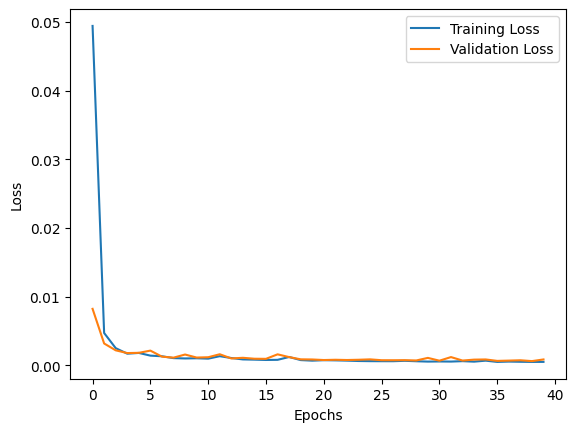

12/12 [==============================] - 0s 10ms/step
Training MSE: 0.0007128982507228338
Training RMSE: 0.026700154507471183
Training MAE: 0.019522838817876677
Training R-squared: 0.9897903262106909
Validation MSE: 0.0007254457510949253
Validation RMSE: 0.026934100153799927
Validation MAE: 0.01967234940475774
Validation R-squared: 0.9899531799672949


In [29]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss over epochs
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 7: Make predictions on the training and validation data
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_test)

# Step 8: Calculate the performance metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

r2_train = r2_score(y_train, y_train_pred)

mse_val = mean_squared_error(y_test, y_val_pred)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_test, y_val_pred)
r2_val = r2_score(y_test, y_val_pred)

print("Training MSE:", mse_train)
print("Training RMSE:", rmse_train)
print("Training MAE:", mae_train)

print("Training R-squared:", r2_train)

print("Validation MSE:", mse_val)
print("Validation RMSE:", rmse_val)
print("Validation MAE:", mae_val)

print("Validation R-squared:", r2_val)

In [18]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,block_size,difficulty,hashrate,market_cap,mining_profitability,transaction,tweets,price
block_size,1.000000,-0.192238,-0.245351,-0.118483,0.176150,0.519285,-0.209529,-0.111356
difficulty,-0.192238,1.000000,0.981280,0.581672,-0.415679,-0.025120,0.684638,0.567948
hashrate,-0.245351,0.981280,1.000000,0.584665,-0.404508,0.000298,0.672749,0.571135
market_cap,-0.118483,0.581672,0.584665,1.000000,0.031528,-0.113602,0.749314,0.999788
mining_profitability,0.176150,-0.415679,-0.404508,0.031528,1.000000,-0.132650,0.029822,0.046558
transaction,0.519285,-0.025120,0.000298,-0.113602,-0.132650,1.000000,-0.280354,-0.114472
tweets,-0.209529,0.684638,0.672749,0.749314,0.029822,-0.280354,1.000000,0.743737
price,-0.111356,0.567948,0.571135,0.999788,0.046558,-0.114472,0.743737,1.000000
